In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date 

LET'S UPLOAD THE DATA SET

In [5]:
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

DEF WE MIGHT NEED FOR THE GRAFFIC

In [28]:
def generate_barchar(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


In [29]:
def prob_category(data,top_n,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=()):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result


In [30]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


DEF TO GENERATE THE AGE WITH THE DATE OF BIRTH

In [8]:
def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

In [9]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2=study_domain.groupby("quest_id").sum()


In [10]:
technologyy = pd.get_dummies(data=technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()


In [11]:
industry1=pd.get_dummies(data=industry[["quest_id","key","values"]], columns= ["values"], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()
#industry2

LETS START CLEANING AND MERGING

In [71]:

quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

merge5=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])


In [72]:
merge5['created_at'] =merge5['created_at'].apply(lambda x : str(x).split("T")[0])

merge11=pd.merge(left=merge5, right=study_domain2, how = 'left',on='quest_id')
merge5['created_at']
merge5.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'Commune_en',
       'Commune_FR', 'Commune_Id', 'Departement', 'ADM1_PCODE'],
      dtype='object')

In [14]:
transaction['Payment Method'] = 'Moncash'
ord['Payment Method'] = 'Credit Card/Paypal'
x = transaction.loc[:,['Payment Method','user_id']]
y = ord.loc[:,['Payment Method','user_id']]
trans_ord= pd.concat([x,y],axis=0)

enroll1=pd.merge(left=enroll,right=trans_ord, how = 'left',on = ['user_id'] )


In [77]:
final_merge=pd.merge(left=merge11, right=enroll1, how = 'left',on='quest_id')
final_merge.info()
final_merge['created_at_x']
final_merge['created_at_x'] = pd.to_datetime(final_merge['created_at_x'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0_x          250 non-null    int64  
 1   gender                250 non-null    object 
 2   dob                   244 non-null    object 
 3   commune               250 non-null    object 
 4   created_at_x          250 non-null    object 
 5   modified_at           250 non-null    object 
 6   department            250 non-null    object 
 7   education_level       250 non-null    object 
 8   university            250 non-null    object 
 9   study_domain          250 non-null    object 
 10  current_employed      250 non-null    object 
 11  formal_sector_job     250 non-null    object 
 12  have_computer_home    250 non-null    object 
 13  internet_at_home      250 non-null    object 
 14  hear_AA_1             250 non-null    object 
 15  after_AA              2

In [ ]:
final_merge['dob'] = final_merge['dob'].astype(str)

final_merge['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final_merge['dob'] = pd.to_datetime(final_merge['dob'])


final_merge['Age'] = final_merge['dob'].apply(Calculate_Age)
final_merge.reset_index()

In [ ]:
move = final_merge.pop('Age')
final_merge.insert(3,'Age',move)
final_merge['Age'] = final_merge['Age'].fillna(final_merge['Age'].mean())
final_merge['Age'] = final_merge['Age'].astype(int)
final_merge['quest_id']
final_merge.columns

## "LET'S SEE HOW MANY PEOPLE WHO FILL THE FORM FOR THE BOOTCAMP AND PAY FOR THE COURSE "ENTWODIKSYON NAN SYANS DONE" TO BE ENROLLED"?

### -we have 65 ENTRIES SO 65 PEOPLE who fill the form and PAY for the course

In [16]:
yyy=final_merge[final_merge['Payment Method']=='Credit Card/Paypal']
xxx=final_merge[final_merge['Payment Method']=='Moncash']
form_and_pay= pd.concat([xxx,yyy],axis=0)
form_and_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 247
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0_x          65 non-null     int64  
 1   gender                65 non-null     object 
 2   dob                   62 non-null     object 
 3   commune               65 non-null     object 
 4   created_at_x          65 non-null     object 
 5   modified_at           65 non-null     object 
 6   department            65 non-null     object 
 7   education_level       65 non-null     object 
 8   university            65 non-null     object 
 9   study_domain          65 non-null     object 
 10  current_employed      65 non-null     object 
 11  formal_sector_job     65 non-null     object 
 12  have_computer_home    65 non-null     object 
 13  internet_at_home      65 non-null     object 
 14  hear_AA_1             65 non-null     object 
 15  after_AA              65

In [62]:

#moy_enroll=enroll1['percentage_completed'].value_counts(ascending=True).mean()
#moy_enroll
#moy_enroll= moy_enroll/10
#en=enroll1[enroll1['percentage_completed'] > moy_enroll]
#en['percentage_completed'].to_frame
#merge_suscept=pd.merge(left=en, right=merge5, how = 'left',on='quest_id')

## LET'S LOOK CLOSER FROM HOW PEOPLE, WHO FILL THE FORM FOR THE BOOTCAMP, HEARD ABOUT AYITI ANALYTICS BOOTCAMP

In [17]:
result3 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0)
result4 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0,margins=True)


count                                       \
hear_AA_1 Ayiti Analytics Website Bootcamp Alumni ESIH Facebook Friend   
gender                                                                   
female                          4               8    5        6     11   
male                           11               6   13       34     56   
All                            15              14   18       40     67   

                                                          
hear_AA_1 Instagram LinkedIn WhatsApp other unknown  All  
gender                                                    
female            1        1        9     2       0   47  
male              4       14       57     7       1  203  
All               5       15       66     9       1  250

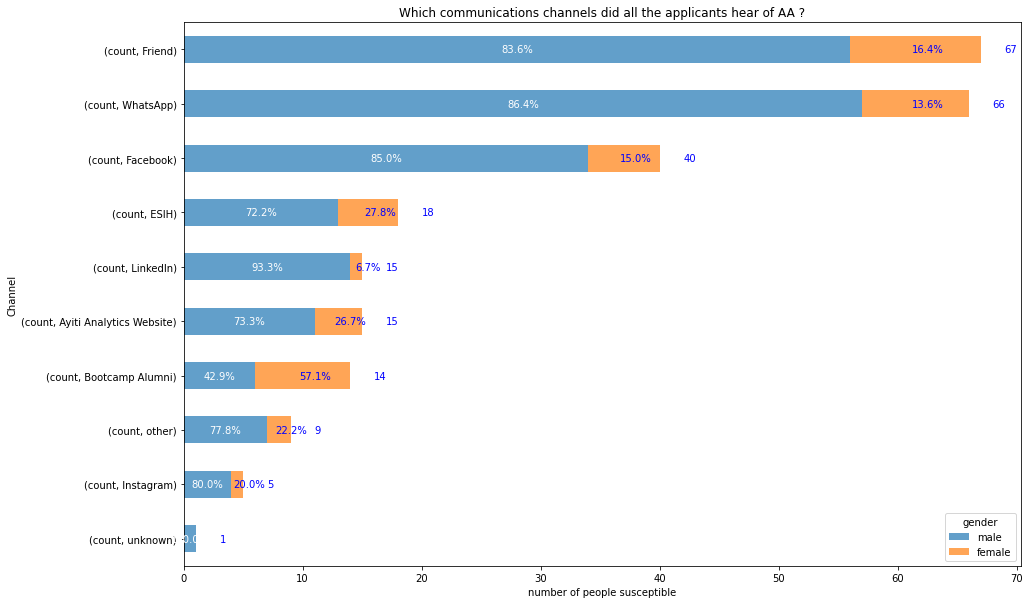

In [99]:
valuess = result3.T
valuess["Total"] = valuess.sum(axis=1)
valuess = valuess.sort_values(by ="Total",ascending=True)
ax =valuess.sort_values(by ="Total",ascending=True)[["male","female"]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
ylab = ax.set_ylabel('Channel')
xlab = ax.set_xlabel('number of people susceptible')
title = ax.set_title('Which communications channels did all the applicants hear of AA ?')
index =0
c =0
for  male,female ,total in zip(valuess["male"],valuess["female"],valuess["Total"]):
    
    if male != total and  female != total  :
        ax.text(male/2,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
        )

        ax.text(male+female/2 + 1.0,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
        )
    elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    else:
        
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    ax.text(total+2.0 ,
            index,
            str(total),
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="left",verticalalignment="center")
    )
    index+=1

result4

# QUESTION 2
## What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection


### Now, from people who fill the form for the bootcamp and pay for the course wich are more susceptible to selection, let's see how they heard about ayiti analytics

### As we can see in the graff, we have friends, whatsapp and facebook with the best score, these are the most effective communication channels

In [31]:
result5 = pd.pivot_table(form_and_pay,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0)
result6 = pd.pivot_table(form_and_pay,'quest_id',index = ['gender'],columns=['hear_AA_1'],aggfunc=['count'],fill_value = 0,margins=True)

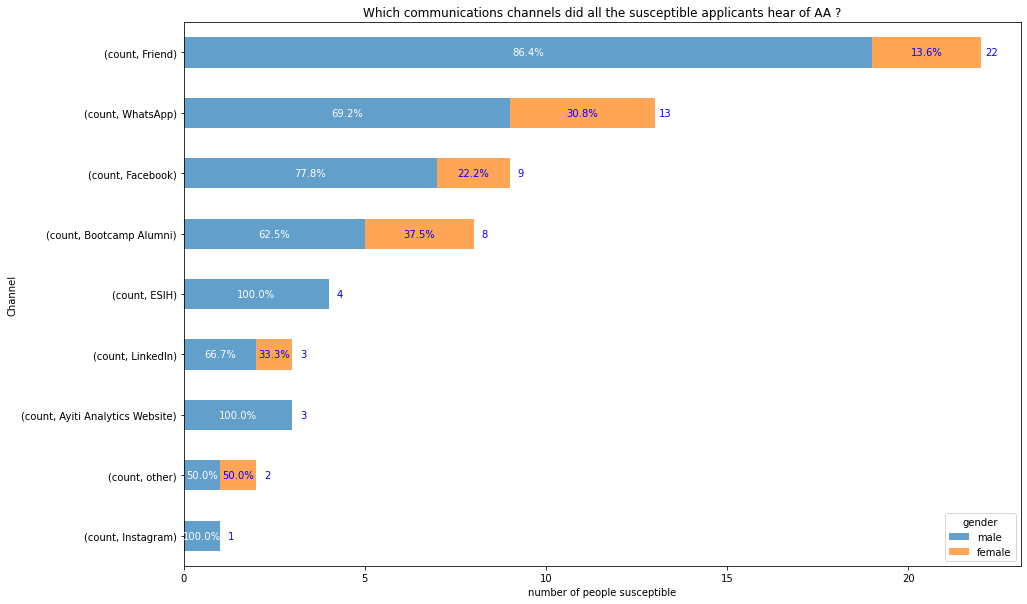

In [100]:
values = result5.T
values["Total"] = values.sum(axis=1)
values = values.sort_values(by ="Total",ascending=True)
ax =values.sort_values(by ="Total",ascending=True)[["male","female"]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
ylab = ax.set_ylabel('Channel')
xlab = ax.set_xlabel('number of people susceptible')
title = ax.set_title('Which communications channels did all the susceptible applicants hear of AA ?')
index =0

for  male,female ,total in zip(values["male"],values["female"],values["Total"]):
    
    if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
        )

        ax.text(male+female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
        )
    elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    else:
        
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    ax.text(total+0.3 ,
            index,
            str(total),
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    index+=1



gender                         female
      hear_AA_1                      
count Instagram                     0
      other                         1
      Ayiti Analytics Website       0
      LinkedIn                      1
      ESIH                          0
      Bootcamp Alumni               3
      Facebook                      2
      WhatsApp                      4
      Friend                        3

# QUESTION 7
## What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection?

### Now, from female who fill the form for the bootcamp and pay for the course wich are more susceptible to selection, let's how they heard about ayiti analytics

### As we can see, we have whatsapp, friend and Alumni with the best score, these are the most effective communication channel that will allow a women to be susceptible

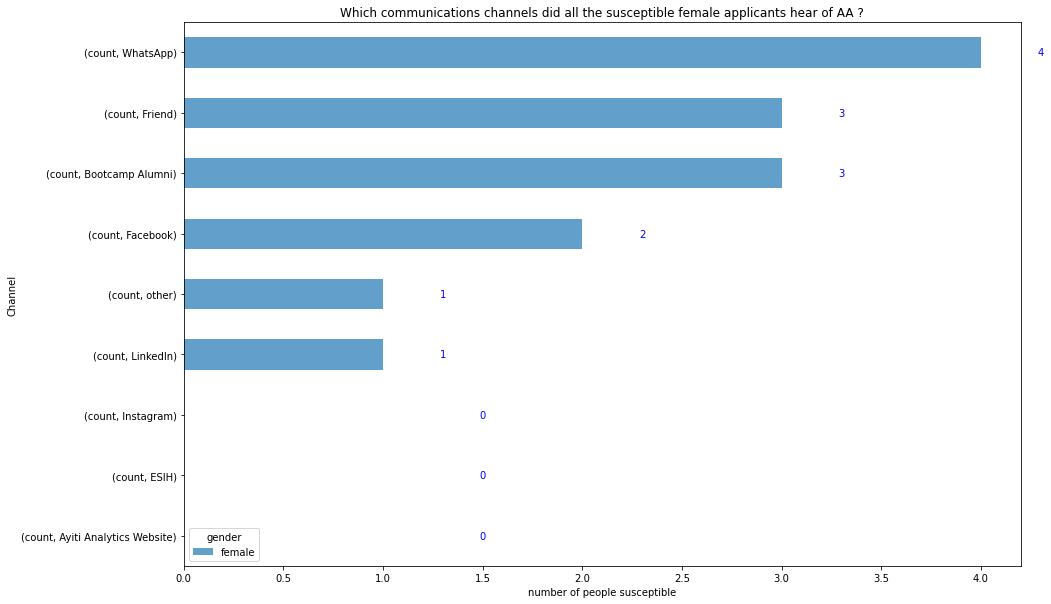

In [101]:
vvalues=values.iloc[:,[0]]
va["Total"] = vvalues.sum(axis=1)
va = va.sort_values(by ="Total",ascending=True)
ax =va.sort_values(by ="Total",ascending=True)[["female"]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
ylab = ax.set_ylabel('Channel')
xlab = ax.set_xlabel('number of people susceptible')
index =0
title = ax.set_title('Which communications channels did all the susceptible female applicants hear of AA ?')
for  female ,total in zip(va["female"],va["Total"]):
    if   female != total  :
        ax.text(female/2 ,
                index,
                str(np.round((female/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
        )
    elif  female==0:
        ax.text(female/2 +1.5,
            index,
            str(np.round((0)*100,1)),
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    else:
        ax.text(total+0.3 ,
            index,
            str(total),
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
    )
    index+=1

In [44]:
rest_com = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value = 0)
rest_com1 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value = 0,margins=True)



# let's see the top 5 communes that have the most applications
## We have delmas with 71 applications, port-au-prince with 57 applications, petion ville with 29 applications, carrefour with 23 applications and tabarre with 11 applications

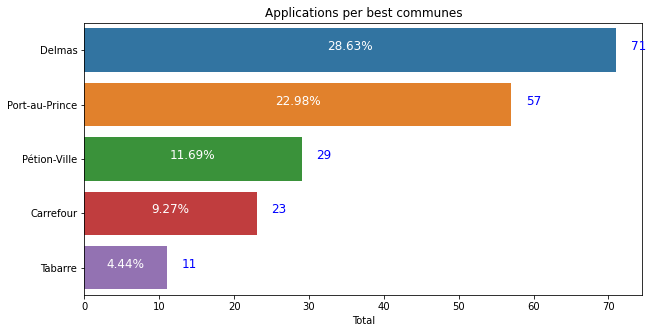

,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Pétion-Ville,29,0.116935
Carrefour,23,0.092742
Tabarre,11,0.044355


In [47]:
prob_category(data=final_merge,top_n =5 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="Applications per best communes",figsize=(10,5))

In [51]:
for col in final_merge.columns:
  print(f"{col} ->{final_merge[col].nunique()}")

Unnamed: 0_x ->250
gender ->2
dob ->236
Age ->30
commune ->35
created_at_x ->28
modified_at ->250
department ->10
education_level ->6
university ->7
study_domain ->31
current_employed ->3
formal_sector_job ->3
have_computer_home ->3
internet_at_home ->3
hear_AA_1 ->10
after_AA ->7
quest_id ->250
Commune_en ->35
Commune_FR ->35
Commune_Id ->35
Departement ->9
ADM1_PCODE ->9
Unnamed: 0_y ->227
Unnamed: 0 ->102
created_at_y ->102
expiry_date ->51
user_id ->102
course_name ->1
course_id ->1
percentage_completed ->34
completed_at ->0
expired ->1
is_free_trial ->2
completed ->1
started_at ->100
activated_at ->65
updated_at ->102
Payment Method ->2


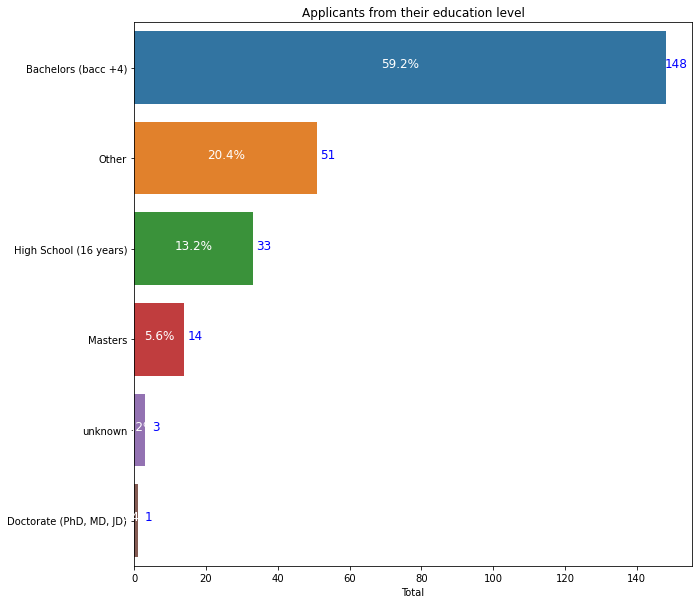

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [102]:
prob_category(data=final_merge ,top_n=7, col="education_level",abs_value ="Total",rel_value ="Percent",show_plot=True, title="Applicants from their education level",figsize=(10,10))

<Figure size 720x432 with 0 Axes>

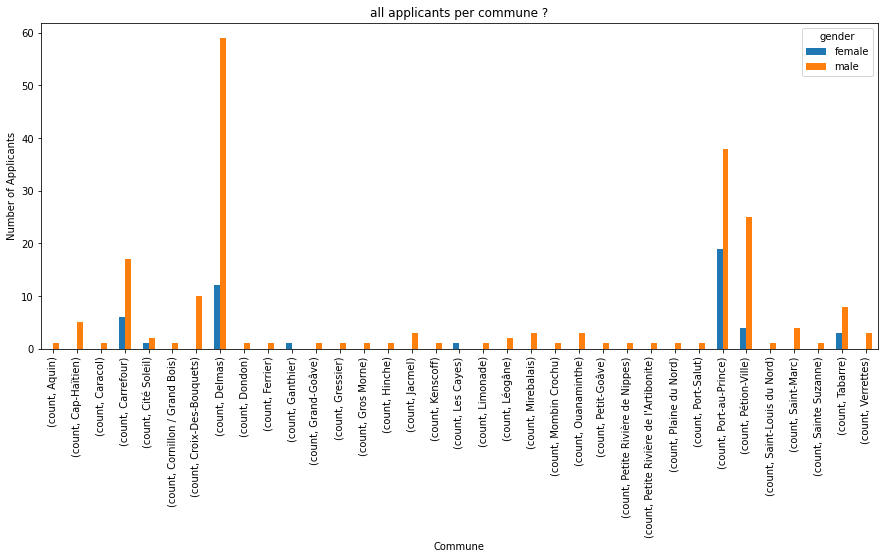

In [103]:
result2 = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value=0)
resulll = pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['Commune_FR'],aggfunc=['count'],fill_value=0,margins=True)

plt.figure(figsize=(10,6))
ax = result2.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Commune')
title = ax.set_title('all applicants per commune ')

In [255]:
rt=final_merge.Commune_FR.value_counts().head(4)
rt

Delmas            71
Port-au-Prince    57
Pétion-Ville      29
Carrefour         23
Name: Commune_FR, dtype: int64

# Question
## If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

## The graf below show the percentage of people who have both internet and computer at the same time in the best communes and we will need 9 more applicants for petion ville and 13 more applicants for carrefour to select 30 students for each commune

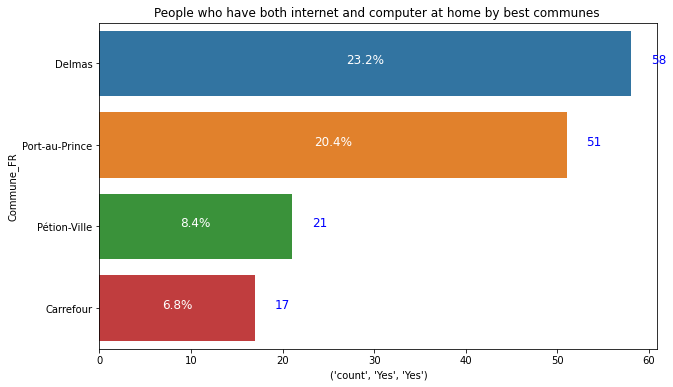

,count,Percent
internet_at_home,Yes,
have_computer_home,Yes,
Commune_FR,,
Delmas,58,0.232
Port-au-Prince,51,0.204
Pétion-Ville,21,0.084
Carrefour,17,0.068


In [55]:
e = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['internet_at_home','have_computer_home'],aggfunc = ['count'],fill_value=0)
g=e.iloc[:,3:4]
both=g.sort_values(by=('count','Yes','Yes'),ascending = False)
both=both.iloc[:4,:]
both['Percent'] = both[('count','Yes','Yes')]/final_merge.shape[0]
generate_barchart(both, title ="People who have both internet and computer at home by best communes ",abs_value =('count','Yes','Yes'),rel_value="Percent",figsize =(10,6))
both

## The graf below show the percentage of people who have both internet in the best communes and we will need 5 more applicants for petion ville and 12 more applicants for carrefour to select 30 students for each commune


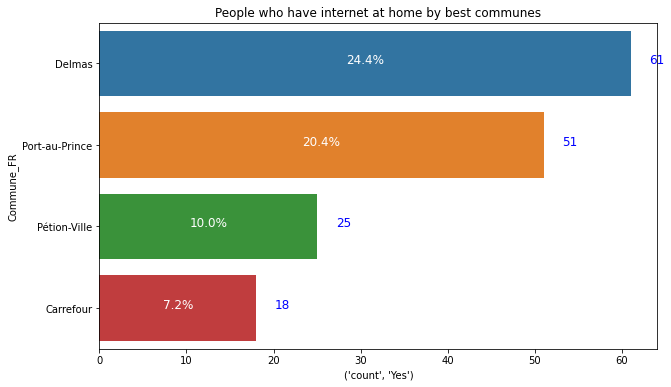

,count,Percent
internet_at_home,Yes,
Commune_FR,,
Delmas,61,0.244
Port-au-Prince,51,0.204
Pétion-Ville,25,0.100
Carrefour,18,0.072


In [57]:
internet = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['internet_at_home'],aggfunc = ['count'],fill_value=0)
internet=internet.iloc[:,1:2]
internet=internet.sort_values(by=('count','Yes'),ascending=False)
internet=internet.iloc[:4,:]
internet['Percent'] = internet[('count','Yes')]/final_merge.shape[0]
generate_barchart(internet, title ="People who have internet at home by best communes",abs_value =('count','Yes'),rel_value="Percent",figsize =(10,6))
internet

## The graf below show the percentage of people who have  computer in the best communes and we will need 5 more applicants for petion ville and 9 more applicants for carrefour to select 30 students for each commune

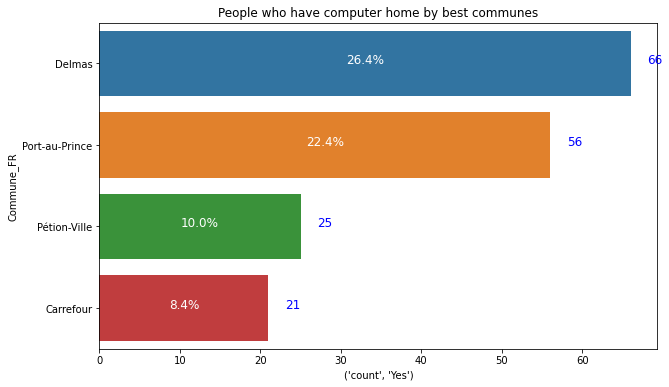

,count,Percent
have_computer_home,Yes,
Commune_FR,,
Delmas,66,0.264
Port-au-Prince,56,0.224
Pétion-Ville,25,0.100
Carrefour,21,0.084


In [59]:
computer = pd.pivot_table(final_merge,'quest_id',index='Commune_FR',columns=['have_computer_home'],aggfunc = ['count'],fill_value=0)
computer=computer.iloc[:,1:2]
computer=computer.sort_values(by=('count','Yes'),ascending=False)
computer=computer.iloc[:4,:]
computer['Percent'] = computer[('count','Yes')]/final_merge.shape[0]
generate_barchart(computer, title ="People who have computer home by best communes",abs_value =('count','Yes'),rel_value="Percent",figsize =(10,6))
computer

In [109]:
resss=pd.pivot_table(final_merge,'quest_id',index = ['gender'],columns=['education_level'],aggfunc=['count'],fill_value = 0)
resss

count                          \
education_level Bachelors (bacc +4) Doctorate (PhD, MD, JD)   
gender                                                        
female                           23                       0   
male                            125                       1   

                                                              
education_level High School (16 years) Masters Other unknown  
gender                                                        
female                               5       5    13       1  
male                                28       9    38       2

# QUESTION 3
## What is the average number of university students who should participate in this program
## The average number of university students who should participate in one cohort should be around 

In [53]:
rt=final_merge.Commune_FR.value_counts().head(4)
rt
educ_lvl = pd.pivot_table(final_merge,'Age',index='Commune_FR',columns='education_level',aggfunc = ['count'],fill_value=0)
educ_lvl = educ_lvl.sort_values(by=('count','Bachelors (bacc +4)'),ascending = False)
educ_lvl=educ_lvl.iloc[:4,[0,1,3]]
educ_lvl['sum'] = educ_lvl.sum(axis = 1)
 
educ_lvl['mean'] = educ_lvl['sum']/rt
display(educ_lvl)
print('The average number of university student who should participate in one cohort should be around',np.round(educ_lvl['mean'].mean(),1)*30)


count                                 sum  \
education_level Bachelors (bacc +4) Doctorate (PhD, MD, JD) Masters       
Commune_FR                                                                
Delmas                           41                       1       5  47   
Port-au-Prince                   28                       0       4  32   
Pétion-Ville                     20                       0       1  21   
Carrefour                        17                       0       1  18   

                     mean  
education_level            
Commune_FR                 
Delmas           0.661972  
Port-au-Prince   0.561404  
Pétion-Ville     0.724138  
Carrefour        0.782609

The average number of university student who should participate in one cohort should be around 21.0


# Question
## What will be the average number of applications per week that we could have

here is the average number of applications per week :  50.0


,date,mean
Number of weeks,,
Week 1,136,50.0
Week 2,54,50.0
Week 3,29,50.0
Week 4,29,50.0
Week 5,2,50.0


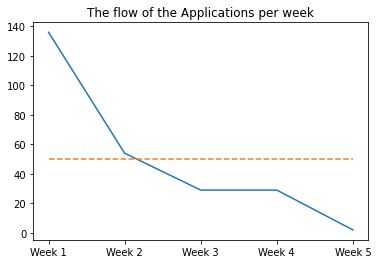

In [85]:
final_merge['date'] = ""
flow_week = final_merge.groupby(pd.Grouper(key='created_at_x', freq='7D'))['date'].value_counts().to_frame()
flow_week['Number of weeks'] = ['Week 1','Week 2','Week 3','Week 4','Week 5']
flow_week = flow_week.set_index('Number of weeks')

#let's put a column mean in the table 
flow_week['mean'] = flow_week.date.mean()
print('here is the average number of applications per week : ',flow_week['mean'][0])
display(flow_week)

# graf for the flow of the week
plt.grid=True
plt.plot(flow_week.index,dg.date)
plt.plot(flow_week.index,flow_week['mean'],label='mean',linestyle = '--')
plt.title('The flow of the Applications per week')
plt.show()



# Question
## How many applications must be made to select 25% women for each on average

In [94]:
gender= pd.pivot_table(final_merge,'Age',index='Commune_FR',columns=['gender'],aggfunc = ['count'],fill_value=0)
gender = gender.sort_values(by= ('count','female'),ascending = False)
gender['Total'] =gender[('count','female')] +gender[('count','male')]

gender['Percentage of female'] =gender[('count','female')]/(gender[('Total')])
tabble =gender.iloc[:4,:] 
tabble


count      Total Percentage of female
gender         female male                           
Commune_FR                                           
Port-au-Prince     19   36    55             0.345455
Delmas             11   59    70             0.157143
Carrefour           5   17    22             0.227273
Pétion-Ville        4   25    29             0.137931

In [95]:
#gender_table.iloc[:4,:] 
tabble['mean']= np.round(tabble['Percentage of female'].mean(),4)
#Determinons le pourcentage d'applications manquants en moyenne par commune pour atteindre les 25%
tabble['perct_mean'] = 0.25 - tabble['mean']
tabble['expectation'] = np.round((tabble['perct_mean']) * tabble['Total'],0)
tabble['mean_excp'] = np.round((tabble['expectation'] + tabble[('count','female')]) / (tabble['Total'] + tabble['expectation']),4)
tabble['mean2'] = np.round(tabble['mean_excp'].mean(),2)

<ipython-input-95-208354a1cc90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabble['mean']= np.round(tabble['Percentage of female'].mean(),4)
<ipython-input-95-208354a1cc90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabble['perct_mean'] = 0.25 - tabble['mean']
<ipython-input-95-208354a1cc90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [96]:
print('The number applications of women  to obtain 25 % on average should exceed :',np.round(tabble['expectation'].sum(),0), 'in the first 4 communes ')
display(tabble)

The number applications of women  to obtain 25 % on average should exceed : 6.0 in the first 4 communes 


count      Total Percentage of female   mean perct_mean  \
gender         female male                                                
Commune_FR                                                                
Port-au-Prince     19   36    55             0.345455  0.217      0.033   
Delmas             11   59    70             0.157143  0.217      0.033   
Carrefour           5   17    22             0.227273  0.217      0.033   
Pétion-Ville        4   25    29             0.137931  0.217      0.033   

               expectation mean_excp mean2  
gender                                      
Commune_FR                                  
Port-au-Prince         2.0    0.3684  0.24  
Delmas                 2.0    0.1806  0.24  
Carrefour              1.0    0.2609  0.24  
Pétion-Ville           1.0    0.1667  0.24

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,45.0,25.333333,7.645557,0.0,22.0,25.0,28.0,45.0
male,199.0,27.065327,7.079687,-1.0,24.0,26.0,30.0,50.0


<AxesSubplot:title={'center':'Average age of applicants by Gender'}, xlabel='gender', ylabel='Age'>

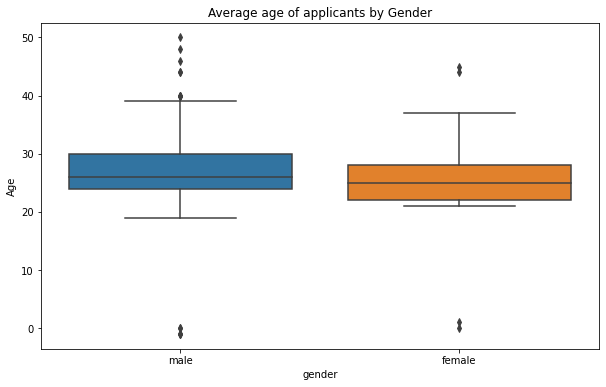

In [104]:
display(final_merge['Age'].groupby(by= final_merge['gender']).describe())
plt.figure(figsize=(10,6))
plt.title('Average age of applicants by Gender')
sns.boxplot(data=final_merge,x="gender",y="Age")

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Bachelors (bacc +4),144.0,27.458333,6.450321,-1.0,25.0,26.5,30.00,46.0
"Doctorate (PhD, MD, JD)",1.0,31.000000,NaN,31.0,31.0,31.0,31.00,31.0
High School (16 years),32.0,22.281250,5.335423,0.0,21.0,22.0,24.00,38.0
Masters,14.0,34.000000,7.452413,24.0,29.0,33.0,34.75,50.0
Other,50.0,25.180000,8.009408,-1.0,23.0,25.0,29.00,40.0
unknown,3.0,31.000000,11.532563,22.0,24.5,27.0,35.50,44.0


Text(0.5, 1.0, 'Boxplot of applicants by education level')

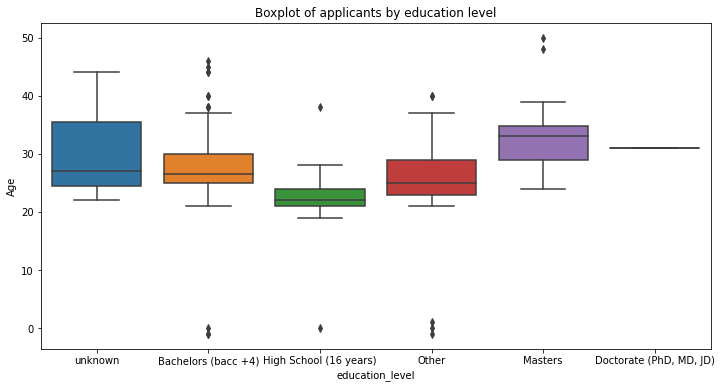

In [105]:
display(final_merge['Age'].groupby(by= final_merge['education_level']).describe())
plt.figure(figsize=(12,6))
sns.boxplot(data=final_merge,x="education_level",y="Age")
plt.title('Boxplot of applicants by education level')


In conclusion after all analysis, we can tell Ayiti Analytics to expand their training center at petion ville, delmas and carrefour, these are the top in our research. fortunatly we can test our hypotesis.

Ayiti Analytics can use friend and whatsapp for promotion so they could have more applications